## Задание

#### a

*Взять код выше и смоделировать ситуацию для двумерного мира (в котором сила тяготения пропорциональна $\frac{1}{R}$) и набора из произвольного количества тел (проверить для трёх, но использовать список).*

#### b

*Посмотреть, как изменится картина, когда тела начнут притягивать друг друга.*

### Задание a
Теперь есть список bodies, в котором содержаться все гравитирующие тела, списки списков X и Y, куда записываются координаты тел на каждом шаге. Убраны все комментарии из исходного кода, чтобы были видны мои. Остальные изменения достаточно очевидны.

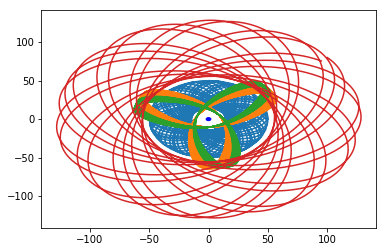

In [1]:
#Задание a
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 2.0  # "гравитационная" постоянная
collision_distance = 3.0  # дистанция, на которой точки начинают отталкиваться
model_delta_t = 0.05
time_to_model = 300

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_density(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist
        else:
            return -100*G / dist ** 3 #оставим куб, и добавим на всякий случай положительный коэффициент - все равно отталкиваются только на малых расстояниях
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)
        force_direction = delta_p / distance   # Единичный вектор, направленный по delta_p
        force = force_direction * self.mass * other.mass * MaterialPoint.gravity_density(distance)
        return force
    
    def advance(self):

        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):

        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
point_2 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
point_3 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([7.0, -7.0]))
point_4 = MaterialPoint(10.0, numpy.array([100.0, 80.0]), numpy.array([14.0, -14.0]))
bodies = [point_1,point_2,point_3,point_4]

def model_step():
    for point in bodies:
        point.apply_force(point.force_induced_by_other(centrum))
    for point in bodies:
        point.advance()

X=[[]]
Y=[[]]
#Симуляция
for point in bodies:
    X.append([])
    Y.append([])
for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(0,len(bodies)):
        X[i].append(bodies[i].position[0])
        Y[i].append(bodies[i].position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)
for i in range(0,len(bodies)):
    plt.plot(X[i],Y[i])

plt.show()

Судя по графикам, все тела вращаются вокруг центрального тела по траекториям, слегка напоминающим полярные розы или фигуры Лиссажу. Для некоторых начальных условий траектории более-менее замкнуты, для других - если и замкнуты, то на таких временах симуляции это не видно.
Видно, что тела не удаляются от центрального дальше, чем на определенное расстояние. Более того, они и не приближаются к центральному телу ближе (другого) определенного расстояния, то есть их траектория лежит между двумя окружностями вокруг центрального тела. Это особенно хорошо видно для тела 1(синего), траектория которого достаточно плотно покрывает эту область.
Тела 2 и 3 отличаются только противоположными начальными скоростями. Это сделано для того, чтобы пронаблюдать симметрию движения этих тел относительно инверсии времени - траектории тел 2 и 3 одинаковы(с точностью до ограничений симуляции).

### Задание b
Все тела в bodies теперь взаимодействуют с остальными(но не с собой, очевидно). Кроме того, на график добавлены(подсчитанные с помощью крутой функции numpy.average, которую я, наверное, применяю далеко не на полную мощность) положения центра масс системы в начале и конце симуляции. Если есть желание проверить качество симуляции, можно записывать положение центра масс на каждом шаге симуляции и сравнивать с расчетным - ведь у нас выполняется закон сохранения импульса, а значит центр масс системы должен двигаться по прямой с постоянной скоростью, и его положение в любой момент времени легко считается из начальных условий. Остальные тела, судя по графикам, вращаются по странным и, похоже, незамкнутым траекториям вокруг центра масс системы, пока не сближаются с другим телом, после чего их траектории заметно искажаются.

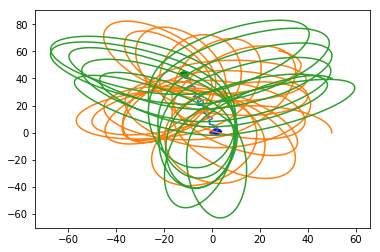

In [5]:
#Задание b
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 2.0  # "гравитационная" постоянная
collision_distance = 3.0  # дистанция, на которой точки начинают отталкиваться
model_delta_t = 0.01
time_to_model = 100

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):

        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_density(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist
        else:
            return -100*G / dist ** 3 # оставим куб, и добавим на всякий случай положительный коэффициент - все равно отталкиваются только на малых расстояниях
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  
        force_direction = delta_p / distance   # Единичный вектор, направленный по delta_p
        force = force_direction * self.mass * other.mass * MaterialPoint.gravity_density(distance)
        return force
    
    def advance(self):

        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):

        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
point_2 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
#point_3 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([7.0, -7.0]))
#point_4 = MaterialPoint(10.0, numpy.array([100.0, 80.0]), numpy.array([7.0, -7.0]))
bodies = [centrum,point_1,point_2]

def model_step():
    for point in bodies:
        for other in bodies:
            if(other==point):
                #Сами с собой тела не взаимодействуют
                continue;
            point.apply_force(point.force_induced_by_other(other))
    for point in bodies:
        point.advance()

X=[[]]
Y=[[]]
#Считаем центр масс системы, чтобы его нарисовать
x_CM=numpy.average([body.position[0] for body in bodies],None,[body.mass for body in bodies])
y_CM=numpy.average([body.position[1] for body in bodies],None,[body.mass for body in bodies])
#print("Center of mass is on x="+str(x_CM)+", y="+str(y_CM))
#Симуляция
for point in bodies:
    X.append([])
    Y.append([])
for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(0,len(bodies)):
        X[i].append(bodies[i].position[0])
        Y[i].append(bodies[i].position[1])
    model_step()

x_CM2=numpy.average([body.position[0] for body in bodies],None,[body.mass for body in bodies])
y_CM2=numpy.average([body.position[1] for body in bodies],None,[body.mass for body in bodies])
    
c = plt.Circle((0, 0), 1, color='r')#Начальное положение центрального тела
CM = plt.Circle((x_CM, y_CM), 2, color='b')#Центр масс системы.
CM2 = plt.Circle((x_CM2, y_CM2), 2, color='g')#Конечное положение центра масс системы.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)
ax.add_patch(CM)
ax.add_patch(CM2)
for i in range(0,len(bodies)):
    plt.plot(X[i],Y[i])

plt.show()